In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('GOOG.csv')
cols = list(df)[1:5]
y_col='Open'
print('{}'.format(cols))
df.head()

['Open', 'High', 'Low', 'Close']


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-06-15,136.986542,138.132248,133.215668,136.886917,136.886917,41922600
1,2005-06-16,136.617920,138.630386,136.025146,138.201981,138.201981,25018100
2,2005-06-17,138.979065,139.626648,137.434860,139.626648,139.626648,20946900
3,2005-06-20,137.529510,143.297882,135.357651,142.814697,142.814697,42206900
4,2005-06-21,143.497131,144.607971,141.952927,143.382568,143.382568,30377900


In [3]:
df = df[cols].astype(str)
for i in cols:
    for j in range(0, len(df)):
        df[i][j] = df[i][j].replace(',', '')

df = df.astype(float)

# Using multiple features (predictors)
training_set = df.to_numpy()

print('Shape of training set == {}.'.format(training_set.shape))
training_set

Shape of training set == (3775, 4).


array([[ 136.986542,  138.132248,  133.215668,  136.886917],
       [ 136.61792 ,  138.630386,  136.025146,  138.201981],
       [ 138.979065,  139.626648,  137.43486 ,  139.626648],
       ...,
       [1459.540039, 1474.259033, 1456.27002 , 1465.849976],
       [1442.47998 , 1454.474976, 1402.      , 1403.839966],
       [1428.48999 , 1437.      , 1386.02002 , 1413.180054]])

In [4]:
X = []
y = []

for i in range(60, training_set.shape[0]):
    X.append(training_set[i-60:i])
    y.append(training_set[i,0])

In [5]:
X,y = np.array(X),np.array(y)
X.shape

(3715, 60, 4)

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [7]:
print(x_train.shape)
print(x_test.shape)

(2489, 60, 4)
(1226, 60, 4)


In [8]:
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

model = Sequential()

model.add(SimpleRNN(units=60, activation='relu', return_sequences=True, input_shape= (x_train.shape[1],4)))
model.add(Dropout(0.2))

model.add(SimpleRNN(units=60, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1))


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
history = model.fit(x_train,y_train, epochs=50, batch_size=32, validation_data=(x_test,y_test))

Epoch 1/50
78/78 [==============================] - 2s 19ms/step - loss: 35806.8516 - val_loss: 3461.2593
Epoch 2/50
78/78 [==============================] - 1s 15ms/step - loss: 15232.9365 - val_loss: 3148.2729
Epoch 3/50
78/78 [==============================] - 1s 15ms/step - loss: 11294.5146 - val_loss: 6151.5410
Epoch 4/50
78/78 [==============================] - 1s 15ms/step - loss: 9783.3145 - val_loss: 3507.8040
Epoch 5/50
78/78 [==============================] - 1s 15ms/step - loss: 9423.6943 - val_loss: 331.6533
Epoch 6/50
78/78 [==============================] - 1s 15ms/step - loss: 8592.2021 - val_loss: 3856.1912
Epoch 7/50
78/78 [==============================] - 1s 15ms/step - loss: 8100.2773 - val_loss: 3074.5632
Epoch 8/50
78/78 [==============================] - 1s 15ms/step - loss: 8107.2319 - val_loss: 662.2022
Epoch 9/50
78/78 [==============================] - 1s 16ms/step - loss: 6639.1968 - val_loss: 6403.3433
Epoch 10/50
78/78 [==============================] - 1

In [12]:
model.save('rnn_model.h5')

In [13]:
import numpy as np
from keras.models import load_model

model = load_model('rnn_model.h5')
y_pred = model.predict(x_test)
y_pred

array([[1086.1006 ],
       [ 145.08717],
       [ 218.89397],
       ...,
       [1226.3989 ],
       [ 164.67079],
       [ 299.4453 ]], dtype=float32)

In [14]:
print(np.mean(np.abs(y_pred-y_test)))

365.91123408003415


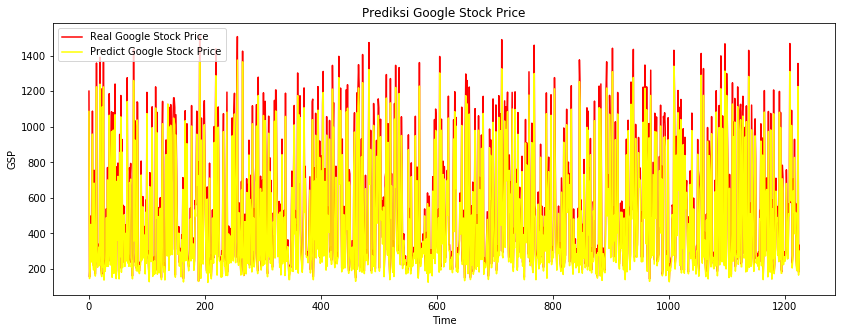

In [15]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Real Google Stock Price')
plt.plot(y_pred, color='yellow', label='Predict Google Stock Price')
plt.title('Prediksi Google Stock Price')
plt.xlabel('Time')
plt.ylabel('GSP')
plt.legend()
plt.show()

In [16]:
real = []
predict = []
for i in range(0, 200):
    real.append(y_test[i])
    predict.append(y_pred[i])

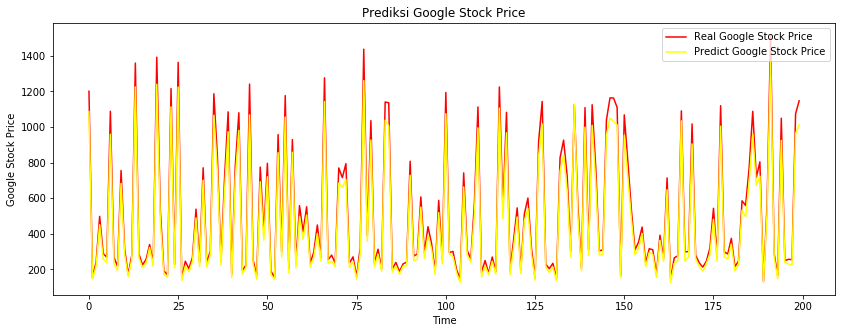

In [17]:
plt.figure(figsize=(14,5))
plt.plot(real, color='red', label='Real Google Stock Price')
plt.plot(predict, color='yellow', label='Predict Google Stock Price')
plt.title('Prediksi Google Stock Price')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

39/39 [==============================] - 0s 4ms/step - loss: 3999.4915


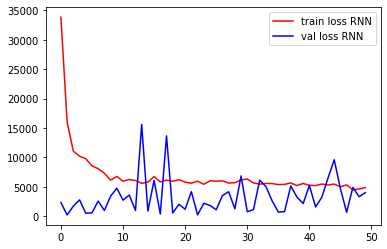

In [18]:
model.evaluate(x_test,y_test)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(50)

import matplotlib.pyplot as plt
plt.plot(epochs,loss,'r',label='train loss RNN')
plt.plot(epochs,val_loss,'b',label='val loss RNN')
plt.legend()